EDA of Hotel Booking Demand

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
df=pd.read_csv('C:\\Users\\91730\\Hotel Booking Analysis Project\\hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


Understanding the Data

In [146]:
df.shape

(119390, 32)

In [147]:
pd.set_option('display.max_columns',32)

In [148]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [149]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [150]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [151]:
df['hotel'].value_counts()

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

In [152]:
df['meal'].value_counts()

meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

Undefine/SC - No meal package , BB-bed&breakfast  ,HB -halfboard(breakfast n one other meal) ,FB-FullBoard

In [153]:
df['market_segment'].value_counts()

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

In [154]:
df['distribution_channel'].value_counts()

distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64

In [155]:
df['deposit_type'].value_counts()

deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: count, dtype: int64

In [156]:
df['customer_type'].value_counts()

customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64

In [157]:
df['total_of_special_requests'].value_counts()

total_of_special_requests
0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: count, dtype: int64

<Axes: xlabel='hotel', ylabel='count'>

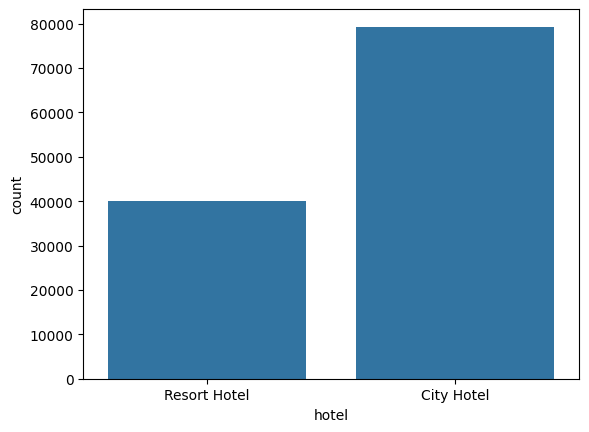

In [158]:
sns.countplot(data=df,x='hotel')

<Axes: xlabel='is_canceled', ylabel='count'>

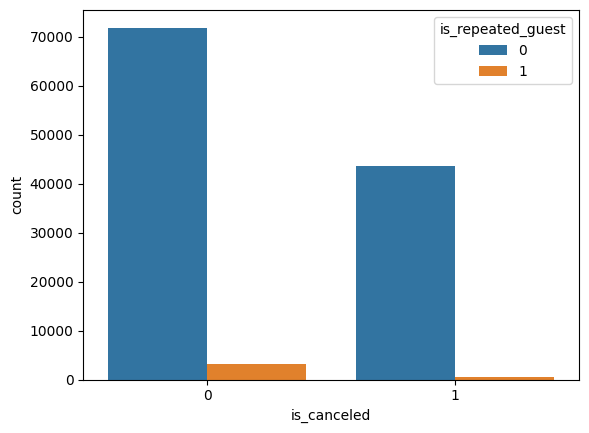

In [159]:
sns.countplot(data=df,x='is_canceled',hue='is_repeated_guest')

<Axes: xlabel='hotel', ylabel='count'>

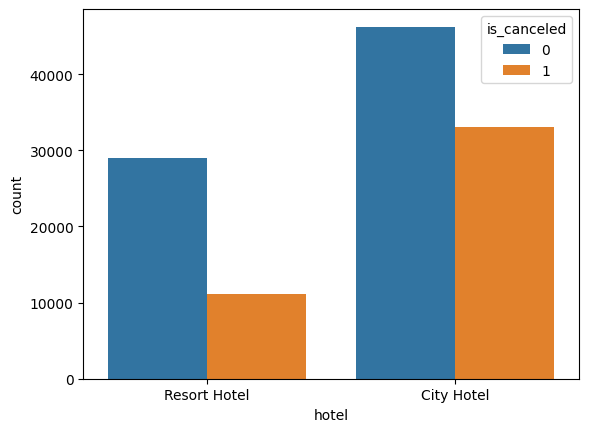

In [160]:
sns.countplot(data=df,x='hotel',hue='is_canceled')

DATA PREPARATION


Missing Data

In [161]:
df.isnull().values.any()  #To check if any null value in data or not.

True

In [162]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [163]:
#Replacing missing values with 0
df.fillna(0,inplace=True)

In [164]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [165]:
#Replace Undefined by SC 
df['meal'].replace('Undefined','SC',inplace=True)

C:\Users\91730\AppData\Local\Temp\ipykernel_9312\251812866.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [166]:
df['meal'].unique() #Undefine no longer exist.

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [167]:
#select only those row where all childern,adults,babies are 0.
Subset=df[ (df['children']==0) & (df['adults']==0) & (df['babies']==0)]

In [168]:
Subset[['adults','babies','children']]

,adults,babies,children
2224,0,0,0.0
2409,0,0,0.0
3181,0,0,0.0
3684,0,0,0.0
3708,0,0,0.0
...,...,...,...
115029,0,0,0.0
115091,0,0,0.0
116251,0,0,0.0
116534,0,0,0.0


180 records with value 0 in adults ,childer,babies in whole row

In [169]:
#So,we are delecting those rows having childern,adults,babies are 0.
Delete=(df['children']==0) & (df['adults']==0) & (df['babies']==0)

In [170]:
type(Delete)

pandas.core.series.Series

In [171]:
print(Delete)

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool


In [172]:
#Negating Delete 
data=df[~Delete]
#**From Now onwardsour corrected Data is 'data' not 'df' anymore

In [173]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [174]:
Subset=data[ (data['children']==0) & (data['adults']==0) & (data['babies']==0)]

In [175]:
print(Subset)

Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date]
Index: []


In [176]:
data.shape

(119210, 32)

119390 -> 119210

In [177]:
# how many records we delected
119390-119210

180

Questions 1.Where do our guest come from.(From which country)

In [178]:
guest_country=data[data['is_canceled']==0]['country'].value_counts().reset_index()
guest_country.columns=['country','Number of guests']

In [179]:
print(guest_country)

    country  Number of guests
0       PRT             20977
1       GBR              9668
2       FRA              8468
3       ESP              6383
4       DEU              6067
..      ...               ...
161     BHR                 1
162     DJI                 1
163     MLI                 1
164     NPL                 1
165     FRO                 1

[166 rows x 2 columns]


In [180]:
!pip install plotly



[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [181]:
import plotly.offline as pyo
import plotly.graph_objs as go 
import plotly.express as px

In [182]:
#Bar Plot
trace=go.Bar(
    x=guest_country['country'],
    y=guest_country['Number of guests'],
    marker=dict(color='#CD7F32')
    )
data1=[trace]
layout=go.Layout(
    title='Guests by Country'
    )
fig=go.Figure(data=data1,layout=layout)
pyo.plot(fig)

'temp-plot.html'

In [183]:
#!pip install nbformat --upgrade


In [184]:
map_guest=px.choropleth(guest_country,
                        locations=guest_country['country'],
                        color=guest_country['Number of guests'],
                        hover_name=guest_country['country'],
                        title='Home country of guests')
pyo.plot(map_guest, filename='map_guest.html')

'map_guest.html'

People from all over the world are staying in these two hotels(city Hotel & resort Hotel).50% of guests are from Portugal ,Greate Britain and France.

How does the Price per night vary over the year?

Miss Interpreting the Data

data["adr_Update"] = data["adr"] / (data["adults"]+data["children"])

In [185]:
resort=data[(data["hotel"]=="Resort Hotel") & (data["is_canceled"]==0)]
city=data[(data["hotel"]=="City Hotel") & (data["is_canceled"]==0)]

In [186]:
print(resort)

              hotel  is_canceled  lead_time  arrival_date_year  \
0      Resort Hotel            0        342               2015   
1      Resort Hotel            0        737               2015   
2      Resort Hotel            0          7               2015   
3      Resort Hotel            0         13               2015   
4      Resort Hotel            0         14               2015   
...             ...          ...        ...                ...   
40055  Resort Hotel            0        212               2017   
40056  Resort Hotel            0        169               2017   
40057  Resort Hotel            0        204               2017   
40058  Resort Hotel            0        211               2017   
40059  Resort Hotel            0        161               2017   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0                   July                        27                          1   
1                   July                     

In [187]:
resort_hotel=resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [188]:
city_hotel=city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [189]:
# Mergeing Two dataframe
final=resort_hotel.merge(city_hotel,on='arrival_date_month')
final.columns=['month','price_for_resort','price_for_city_hotel']
final

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


Sorting the dataset using python module  - sort_dataframeby_monthrweek

In [190]:
!pip install sort_dataframeby_monthorweek



[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [194]:
!pip install sorted_months_weekdays


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for sorted_months_weekdays: started
  Running setup.py install for sorted_months_weekdays: finished with status 'done'


  DEPRECATION: sorted_months_weekdays is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [198]:
import sort_dataframeby_monthorweek as sd
final=sd.Sort_Dataframeby_Month(df=final,monthcolumnname='month')
final

,month,price_for_resort,price_for_city_hotel
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


In [199]:
# Creating line chart
px.line(final,x='month',
        y=['price_for_resort','price_for_city_hotel'],
        title='Room price per night over the Months')

How much Do guests pay for a room per Night?

In [200]:
df["reserved_room_type"].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [201]:
data["adr_Update"] = data["adr"] / (data["adults"]+data["children"])
data

C:\Users\91730\AppData\Local\Temp\ipykernel_9312\634626835.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_Update
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015,0.000000
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015,0.000000
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,...,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015,75.000000
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,...,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015,75.000000
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,...,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015,49.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,...,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017,48.070000
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,...,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017,75.143333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,...,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017,78.855000
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,...,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017,52.200000


C:\Users\91730\AppData\Local\Temp\ipykernel_9312\850738022.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



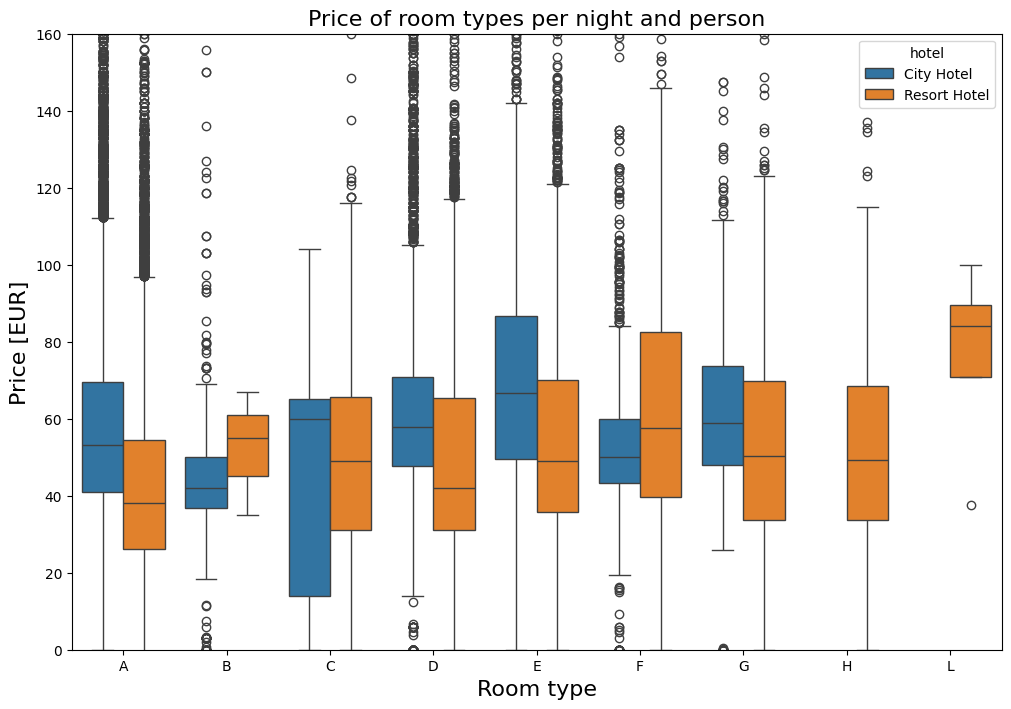

In [207]:
data["adr_Update"] = data["adr"] / (data["adults"]+data["children"])
valid_guest=data.loc[data["is_canceled"]==0]
prices=prices=valid_guest[["hotel","reserved_room_type","adr_Update"]].sort_values("reserved_room_type")

plt.figure(figsize=(12,8))
sns.boxplot(x="reserved_room_type",
            y="adr_Update",
            hue="hotel",
            data=prices)
plt.title("Price of room types per night and person",fontsize=16)
plt.xlabel("Room type",fontsize=16)
plt.ylabel("Price [EUR]",fontsize=16)

plt.ylim(0,160)
plt.show()


In [208]:
# sorting columns hotel,reserved_room_type,adr_Upadte
prices=valid_guest[["hotel","reserved_room_type","adr_Update"]].sort_values("reserved_room_type")
prices

,hotel,reserved_room_type,adr_Update
119389,City Hotel,A,75.60
102432,City Hotel,A,89.55
77019,City Hotel,A,53.00
77020,City Hotel,A,53.00
77021,City Hotel,A,50.40
...,...,...,...
24110,Resort Hotel,H,34.00
354,Resort Hotel,L,37.50
15855,Resort Hotel,L,86.00
911,Resort Hotel,L,100.00
